In [3]:
import pandas as pd
from get_r_groups import get_r_df, r_groups_from_scaffold
from get_r_data import get_smiles_and_activity
from auto_radialscope import make_auto_radial_scope
from calculate_drawing_angle import get_bond_angle, create_r_group_map
from rdkit import Chem
from rdkit.Chem import PandasTools
from radialscope import RadialScope as rs
from IPython.display import SVG
from radialscope import draw_with_indeces

In [4]:
df = pd.read_excel('AL data.xlsx')
a_df=df.replace("Œ±-amino amination", "alpha-amino amination")
b_df=a_df.replace("Œ≤-amino deamination", "beta-amino amination")
df_PAL=b_df[b_df['enzyme_type'] == "PAL"]
df_PAL = df_PAL.dropna(subset=['product_1_smiles'])
PandasTools.AddMoleculeColumnToFrame(df_PAL,'product_1_smiles','Product Mol')

#df_PAL.head()
# Make basic adjustments to the table after importing excel
# Then add the “Product Mol” column based on the “product_1_smiles” column.

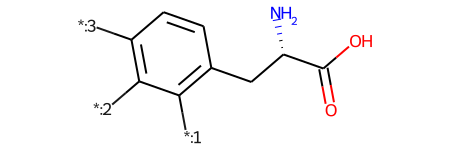

In [5]:
scaffold_smi = 'N[C@@H](CC1=C([*:1])C([*:2])=C([*:3])C=C1)C(O)=O'
scaffold = Chem.MolFromSmiles(scaffold_smi)
scaffold

File written to: /Users/Will/documentsPython_Projects/automated_radial_scope_plot/substrate_scope_replaced.svg


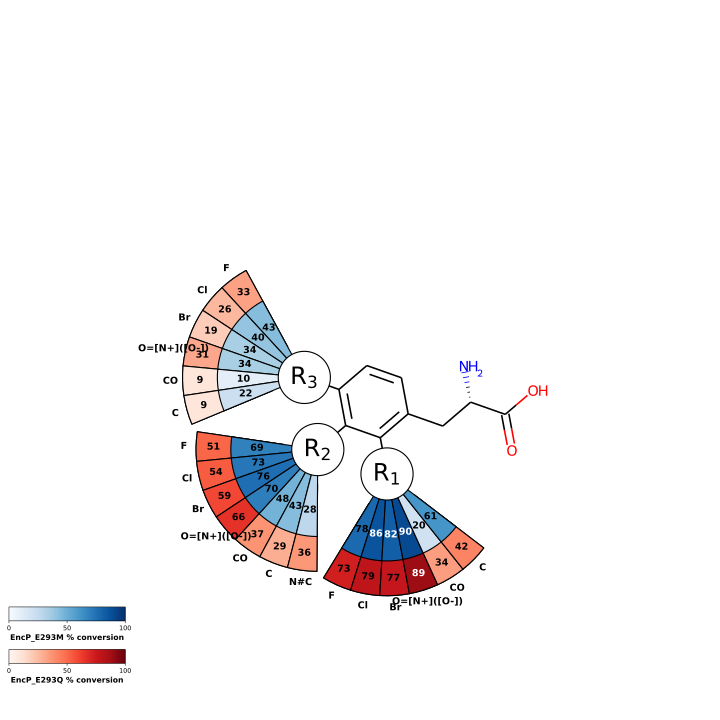

In [9]:
scope_plot = make_auto_radial_scope(["EncP_E293M", "EncP_E293Q"], 
                                    df_PAL, scaffold_smi, 
                                    angle_per_wedge=14,
                                    colours=['Blues', 'Reds'])

SVG('substrate_scope_replaced.svg')